In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline


In [2]:
data = pandas.read_csv("Temporal.csv")
data=data.dropna()

In [3]:
data.head()
data=data.drop(['Unnamed: 0', 'id'],axis=1)
#y=data.drop(['Unnamed: 0', 'id', 'КОД3 основной'])

In [4]:
data.columns

#data['КОД3 основной']=data['КОД3 основной'].apply(lambda x: 0 if(x>1) else 1 )

Index(['КОД3 основной', 'Left-bankssts-SurfArea', 'Left-bankssts-GrayVol',
       'Left-bankssts-ThickAvg', 'Left-entorhinal-SurfArea',
       'Left-entorhinal-GrayVol', 'Left-entorhinal-ThickAvg',
       'Left-fusiform-SurfArea', 'Left-fusiform-GrayVol',
       'Left-fusiform-ThickAvg', 'Left-inferiortemporal-SurfArea',
       'Left-inferiortemporal-GrayVol', 'Left-inferiortemporal-ThickAvg',
       'Left-lingual-SurfArea', 'Left-lingual-GrayVol',
       'Left-lingual-ThickAvg', 'Left-middletemporal-SurfArea',
       'Left-middletemporal-GrayVol', 'Left-middletemporal-ThickAvg',
       'Left-superiortemporal-SurfArea', 'Left-superiortemporal-GrayVol',
       'Left-superiortemporal-ThickAvg', 'Left-temporalpole-SurfArea',
       'Left-temporalpole-GrayVol', 'Left-temporalpole-ThickAvg',
       'Left-transversetemporal-SurfArea', 'Left-transversetemporal-GrayVol',
       'Left-transversetemporal-ThickAvg', 'Right-bankssts-SurfArea',
       'Right-bankssts-GrayVol', 'Right-bankssts-Thick

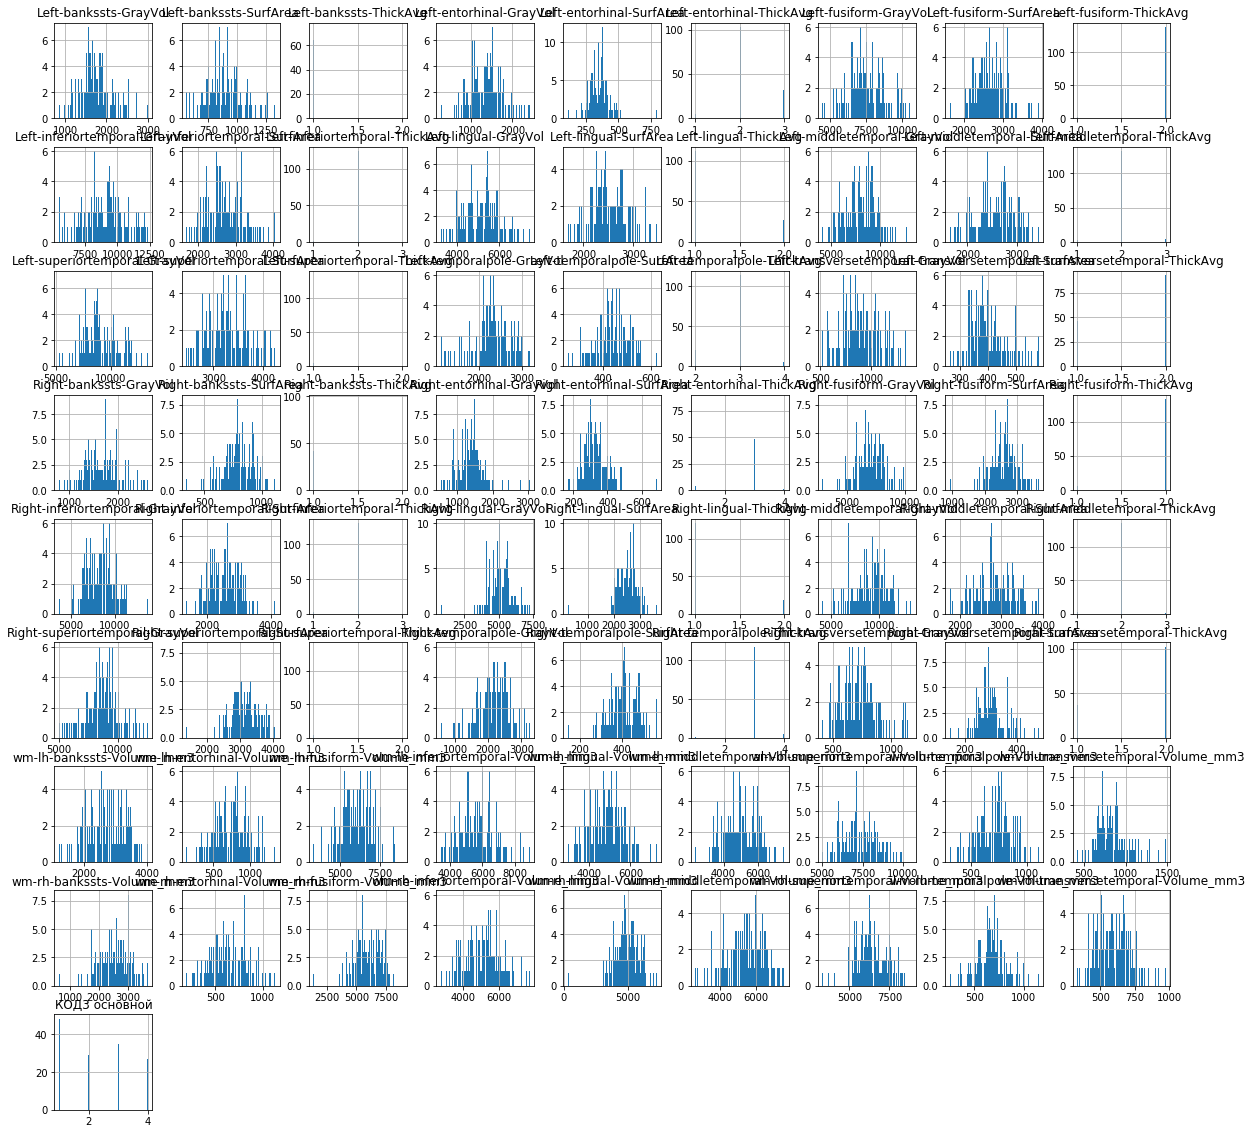

In [5]:
hist1 = data.hist(bins=100,figsize=(20,20))


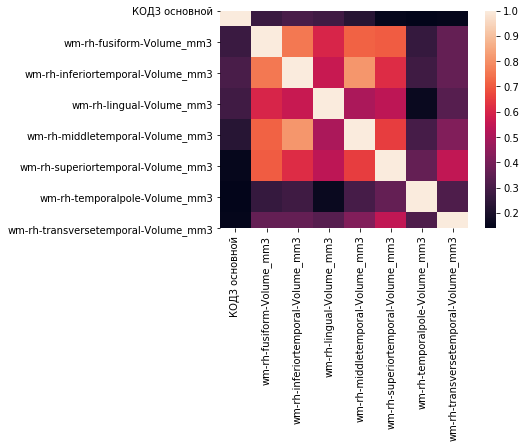

In [6]:
seaborn.heatmap(data[['КОД3 основной','wm-rh-fusiform-Volume_mm3',
       'wm-rh-inferiortemporal-Volume_mm3', 'wm-rh-lingual-Volume_mm3',
       'wm-rh-middletemporal-Volume_mm3', 'wm-rh-superiortemporal-Volume_mm3',
       'wm-rh-temporalpole-Volume_mm3', 'wm-rh-transversetemporal-Volume_mm3']].corr(), square=True)

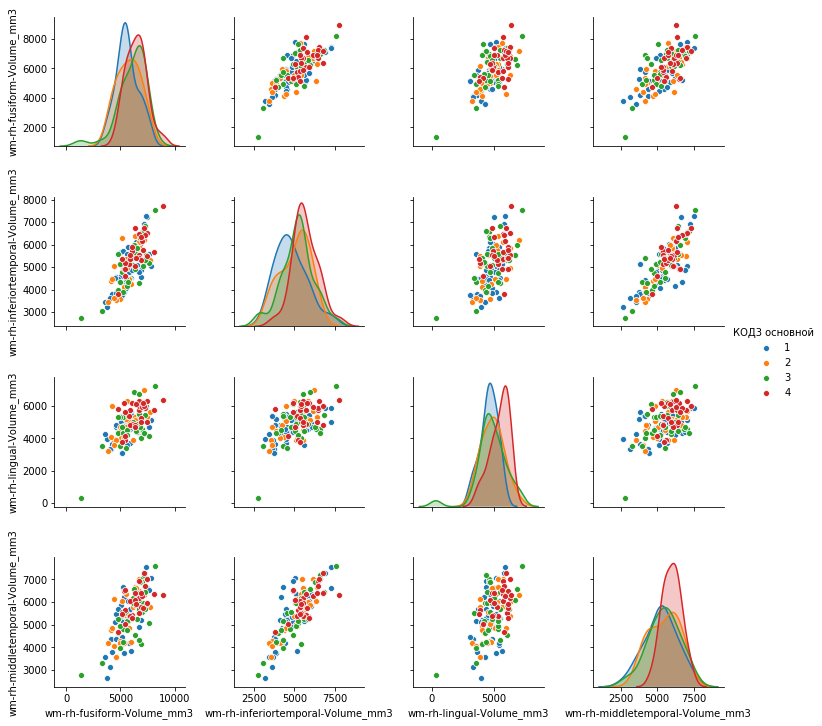

In [7]:
seaborn.pairplot(data[['КОД3 основной', 'wm-rh-fusiform-Volume_mm3',
       'wm-rh-inferiortemporal-Volume_mm3', 'wm-rh-lingual-Volume_mm3',
       'wm-rh-middletemporal-Volume_mm3']], hue='КОД3 основной');

In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))


d=[]
for n in range(1,55):
    model = PCA(n_components=n)
    scores = cv_score(model, data.drop(['КОД3 основной'],axis=1),cv=10)
    d.append(scores.mean())

In [9]:
model = PCA(n_components=55)
model.fit_transform(data.drop(['КОД3 основной'],axis=1))

array([[-2.14865105e+03, -4.70670651e+01,  2.72694515e+03, ...,
         1.37804031e+01,  3.55686828e+00,  4.47225383e-01],
       [-4.95404611e+03, -5.34464258e+02, -2.46400870e+01, ...,
         7.50359035e+00,  1.00246880e+01, -7.06921427e-01],
       [-5.08399973e+03,  9.31002343e+02,  2.27749408e+02, ...,
         7.62833702e+00, -4.73106552e+00,  3.30174582e-01],
       ...,
       [-5.54215949e+03, -1.92124843e+02, -7.08166269e+02, ...,
         2.15175701e+00, -1.52434225e+00, -4.30892242e-02],
       [ 5.81145361e+03, -2.42985337e+03, -2.29630037e+03, ...,
        -1.98257891e+01,  1.12337036e+01,  2.14902181e-01],
       [-6.00726635e+03, -1.28529109e+02, -1.26479977e+03, ...,
        -8.25775238e+00, -4.22628186e+01, -9.65817521e-02]])

In [10]:
model.components_ 

array([[ 1.80185579e-02,  4.73270437e-02,  3.19322492e-05, ...,
         1.61919687e-01,  1.08383753e-02,  1.31709572e-02],
       [-9.83497064e-03,  2.65057381e-02,  6.02259746e-05, ...,
        -1.95804894e-01,  7.49630441e-04, -1.06636992e-02],
       [ 1.89719475e-02, -1.24891422e-02, -6.45267380e-05, ...,
        -1.12205690e-01, -6.05770567e-04, -1.26897675e-02],
       ...,
       [-4.88887540e-02,  1.09287120e-02,  1.40335138e-03, ...,
        -1.48580169e-02, -6.18837763e-02, -4.13789203e-02],
       [-2.39590732e-02, -1.08061805e-02,  9.25874195e-04, ...,
        -4.66524578e-03, -2.08017137e-01,  3.95591070e-02],
       [-1.12543766e-03,  6.68570000e-04, -4.87580786e-01, ...,
         1.27570787e-04, -3.70502208e-04, -7.11940130e-04]])

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [12]:

X_d=data.drop(['КОД3 основной'],axis=1).values
y=data['КОД3 основной'].values 

In [13]:
from sklearn.preprocessing import Normalizer

X_d = Normalizer().fit_transform(X_d)
X_d

array([[2.87113243e-02, 4.34639171e-02, 3.30775625e-05, ...,
        2.03625475e-01, 2.18642688e-02, 1.71010998e-02],
       [3.54393444e-02, 7.04837215e-02, 7.18122481e-05, ...,
        1.96980996e-01, 1.86711845e-02, 1.57268823e-02],
       [3.21634224e-02, 5.71027804e-02, 3.63018311e-05, ...,
        2.02491614e-01, 2.30516628e-02, 1.79694064e-02],
       ...,
       [2.47651811e-02, 4.04449111e-02, 3.66348832e-05, ...,
        2.00832430e-01, 2.69266392e-02, 1.65956021e-02],
       [2.25672604e-02, 4.84245087e-02, 5.14060602e-05, ...,
        1.87786338e-01, 1.82234483e-02, 1.47535393e-02],
       [2.08855321e-02, 3.96862339e-02, 3.72291124e-05, ...,
        2.30857726e-01, 2.03643245e-02, 1.53383943e-02]])

In [14]:
clf = DecisionTreeClassifier(random_state=0)
score1=cross_val_score(clf, X_d, y, cv=5).mean()
#score2=cross_val_score(clf, X_m, y, cv=10).mean()

In [15]:
score1

0.32460387632801424

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0), n_estimators=100, random_state=0)
score2=cross_val_score(clf2, X_d, y, cv=5).mean()
score2

0.3860279567176119

In [17]:
clf3 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0), n_estimators=1000, random_state=0,max_features=3)
score3=cross_val_score(clf3, X_d, y, cv=5).mean()
score3

0.4101490463559429

In [18]:
clf4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0,max_features=int(np.sqrt(X_d.shape[1]))), n_estimators=100, random_state=0)
score4=cross_val_score(clf4, X_d, y, cv=5).mean()
score4

0.34336238474169506

In [19]:
m=np.linspace(1,100,100)
s=[]
for i in m:
    clf5 = RandomForestClassifier(max_depth=5, max_features=9,random_state=0,n_estimators=19)
    s.append(cross_val_score(clf5, X_d, y, cv=5).mean())


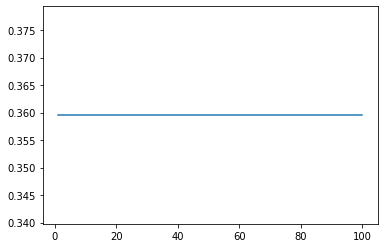

In [20]:
plt.plot(m,s)

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.linspace(1,10,5).astype(int), 'max_features':np.linspace(1,10,10).astype(int),'n_estimators':np.linspace(10,20,5).astype(int)}
clf6=RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf6, parameters,cv=5)
clf.fit(X_d, y)

c:\program files\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [22]:
pandas.DataFrame(clf.cv_results_).sort_values(by=['mean_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
141,0.007570,0.000794,0.001007,1.675701e-05,5,9,12,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.448276,0.275862,0.285714,0.222222,0.230769,0.294964,0.082437,250
117,0.008577,0.000488,0.000997,1.784161e-07,5,4,15,"{'max_depth': 5, 'max_features': 4, 'n_estimat...",0.310345,0.275862,0.392857,0.259259,0.269231,0.302158,0.048740,248
115,0.005784,0.000399,0.000798,3.989935e-04,5,4,10,"{'max_depth': 5, 'max_features': 4, 'n_estimat...",0.275862,0.206897,0.428571,0.259259,0.346154,0.302158,0.077306,248
95,0.006183,0.000399,0.000997,1.907349e-07,3,10,10,"{'max_depth': 3, 'max_features': 10, 'n_estima...",0.310345,0.344828,0.428571,0.222222,0.269231,0.316547,0.069641,242
80,0.007978,0.001093,0.000997,1.784161e-07,3,7,10,"{'max_depth': 3, 'max_features': 7, 'n_estimat...",0.379310,0.275862,0.357143,0.185185,0.384615,0.316547,0.075616,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.011970,0.000022,0.001396,4.891623e-04,5,6,20,"{'max_depth': 5, 'max_features': 6, 'n_estimat...",0.448276,0.482759,0.428571,0.407407,0.423077,0.438849,0.026089,5
110,0.005385,0.000489,0.000998,1.784161e-07,5,3,10,"{'max_depth': 5, 'max_features': 3, 'n_estimat...",0.482759,0.551724,0.392857,0.370370,0.423077,0.446043,0.066273,4
113,0.009175,0.000399,0.001197,3.989220e-04,5,3,17,"{'max_depth': 5, 'max_features': 3, 'n_estimat...",0.448276,0.482759,0.464286,0.444444,0.423077,0.453237,0.019918,2
114,0.010572,0.000489,0.001596,4.886555e-04,5,3,20,"{'max_depth': 5, 'max_features': 3, 'n_estimat...",0.448276,0.482759,0.500000,0.333333,0.500000,0.453237,0.061880,2


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.12, random_state=0,stratify=y)

In [24]:
clf = RandomForestClassifier(max_depth=10, max_features=10,random_state=0,n_estimators=10)
clf.fit(X_train,y_train)
clf.predict(X_test)

array([1, 1, 3, 3, 3, 1, 1, 2, 1, 4, 1, 1, 4, 2, 1, 1, 4], dtype=int64)

In [25]:
y_test

array([3, 1, 4, 3, 4, 2, 3, 2, 2, 4, 1, 3, 1, 1, 2, 1, 1], dtype=int64)